In [2]:
import os,cv2,keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

### initialise selective search

In [ ]:
ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()

### initialising the function to calculate IOU

In [ ]:
def get_iou(bb1, bb2):
    assert bb1['x1'] < bb1['x2']
    assert bb1['y1'] < bb1['y2']
    assert bb2['x1'] < bb2['x2']
    assert bb2['y1'] < bb2['y2']    
    x_left = max(bb1['x1'], bb2['x1'])
    y_top = max(bb1['y1'], bb2['y1'])
    x_right = min(bb1['x2'], bb2['x2'])
    y_bottom = min(bb1['y2'], bb2['y2'])    
    if (x_right < x_left) or (y_bottom < y_top):
        return 0.0    
    intersection_area = (x_right - x_left) * (y_bottom - y_top)    
    bb1_area = (bb1['x2'] - bb1['x1']) * (bb1['y2'] - bb1['y1'])
    bb2_area = (bb2['x2'] - bb2['x1']) * (bb2['y2'] - bb2['y1']) 

    iou = intersection_area / float(bb1_area + bb2_area - intersection_area)
    assert iou >= 0.0
    assert iou <= 1.0
    return iou

#### getting datafram from id



In [ ]:
def get_image_datafram(filename, dataframe_all):
  new_df = df_all[df_all['filename'] == filename]
  return new_df



In [ ]:
df_all = pd.read_csv('/content/drive/MyDrive/Potholes/train/_annotations.csv')
path =r'/content/drive/MyDrive/Potholes/train'

prev_row = None
for i, row in df_all.iterrows():
  if prev_row != row['filename']:
    print(row['filename'])
    prev_row = row['filename']
  else:
    continue

img-561_jpg.rf.00e55aff1b67a607a6631ac6a05bf7af.jpg
img-78_jpg.rf.01130ebf73370c115ee9de4fc1f29be5.jpg
img-380_jpg.rf.0211b9d66b12bdee8d05b9ba890573dc.jpg
img-235_jpg.rf.030dcf4264c55859ef30294c84f77482.jpg
img-110_jpg.rf.0390f81a2c5b2ad5676a8eb5b043d743.jpg
img-664_jpg.rf.0392cc4f0a63d256e7c42f057345f8b5.jpg
img-162_jpg.rf.0459e44683fd65132e9e2558f7cfcc6a.jpg
img-80_jpg.rf.02752f42e0f4bc24481a8d9d938a7569.jpg
img-1_jpg.rf.04766deb9036fc43721c26f431c3eb3d.jpg
img-566_jpg.rf.04baef7f164a924d84511224f7b46b8a.jpg
img-240_jpg.rf.06da3127a48b2f044201c9b2f9755109.jpg
img-652_jpg.rf.0590f1d28a51cd3ae140c3b7c8a35e19.jpg
img-31_jpg.rf.04f6a2c9ec048f70c2faeb7e4193784d.jpg
img-281_jpg.rf.09e7fcea8709dc8bd7d799bd346b3d0f.jpg
img-533_jpg.rf.0a1292d1f04bbf45d8846532b3ad0eb8.jpg
img-53_jpg.rf.0a3288162e47d617b9108c8b7027f362.jpg
img-620_jpg.rf.077f5547cc7daeccf1aa61fd6ca2f0a4.jpg
img-640_jpg.rf.07e03157df4d66c761b4b8c3a4418cb9.jpg
img-320_jpg.rf.0765b31c7ff97bf3c391782c13bb9818.jpg
img-268_jpg.rf.087

In [ ]:
train_images=[]
train_labels=[]

df_all = pd.read_csv('/content/drive/MyDrive/Potholes/train/_annotations.csv')
path =r'/content/drive/MyDrive/Potholes/train'

prev_row = None
for e,current_row in df_all.iterrows():
  if prev_row == current_row['filename']:
    continue
  else:
      try:       
          filename = current_row['filename']
          prev_row = filename
          print(e,filename)
          image = cv2.imread(os.path.join(path,filename))
          df = get_image_datafram(filename, df_all)
          gtvalues=[]
          for xtra, row in df.iterrows():
              x1 = row['xmin']
              y1 = row['ymin']
              x2 = row['xmax']
              y2 = row['ymax']
              gtvalues.append({"x1":x1,"x2":x2,"y1":y1,"y2":y2})
          ss.setBaseImage(image)
          ss.switchToSelectiveSearchFast()
          ssresults = ss.process()
          imout = image.copy()
          counter = 0
          falsecounter = 0
          flag = 0
          fflag = 0
          bflag = 0
          for e,result in enumerate(ssresults):
              if e < 2000 and flag == 0:
                  for gtval in gtvalues:
                      x,y,w,h = result
                      iou = get_iou(gtval,{"x1":x,"x2":x+w,"y1":y,"y2":y+h})
                      if counter < 30:
                          if iou > 0.70:
                              timage = imout[y:y+h,x:x+w]
                              resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
                              train_images.append(resized)
                              train_labels.append(1)
                              counter += 1
                      else :
                          fflag =1
                      if falsecounter <30:
                          if iou < 0.3:
                              timage = imout[y:y+h,x:x+w]
                              resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
                              train_images.append(resized)
                              train_labels.append(0)
                              falsecounter += 1
                      else :
                          bflag = 1
                  if fflag == 1 and bflag == 1:
                      print("inside")
                      flag = 1
      except Exception as e:
          print(e)
          print("error in "+filename)
          continue

0 img-561_jpg.rf.00e55aff1b67a607a6631ac6a05bf7af.jpg
9 img-78_jpg.rf.01130ebf73370c115ee9de4fc1f29be5.jpg
11 img-380_jpg.rf.0211b9d66b12bdee8d05b9ba890573dc.jpg
12 img-235_jpg.rf.030dcf4264c55859ef30294c84f77482.jpg
13 img-110_jpg.rf.0390f81a2c5b2ad5676a8eb5b043d743.jpg
15 img-664_jpg.rf.0392cc4f0a63d256e7c42f057345f8b5.jpg
16 img-162_jpg.rf.0459e44683fd65132e9e2558f7cfcc6a.jpg
17 img-80_jpg.rf.02752f42e0f4bc24481a8d9d938a7569.jpg
18 img-1_jpg.rf.04766deb9036fc43721c26f431c3eb3d.jpg
19 img-566_jpg.rf.04baef7f164a924d84511224f7b46b8a.jpg
29 img-240_jpg.rf.06da3127a48b2f044201c9b2f9755109.jpg
33 img-652_jpg.rf.0590f1d28a51cd3ae140c3b7c8a35e19.jpg
36 img-31_jpg.rf.04f6a2c9ec048f70c2faeb7e4193784d.jpg
37 img-281_jpg.rf.09e7fcea8709dc8bd7d799bd346b3d0f.jpg
38 img-533_jpg.rf.0a1292d1f04bbf45d8846532b3ad0eb8.jpg
41 img-53_jpg.rf.0a3288162e47d617b9108c8b7027f362.jpg
43 img-620_jpg.rf.077f5547cc7daeccf1aa61fd6ca2f0a4.jpg
45 img-640_jpg.rf.07e03157df4d66c761b4b8c3a4418cb9.jpg
46 img-320_jpg.rf.

In [ ]:
# train_images=[]
# train_labels=[]

# df_all = pd.read_csv('/content/drive/MyDrive/Potholes/train/_annotations.csv')
# path =r'/content/drive/MyDrive/Potholes/train'


# i = 0
# item = 0
# while item<50:
#     try:
#         filename = df_all.iloc[i]['filename']
#         print(filename)
#         image = cv2.imread(os.path.join(path,filename))

#         df = get_image_datafram(filename, df_all)
#         offset = len(df)
#         i+= offset
#         item +=1

#         gtvalues=[]
#         for index, row in df.iterrows():
#             x1 = row['xmin']
#             y1 = row['ymin']
#             x2 = row['xmax']
#             y2 = row['ymax']

#             gtvalues.append({"x1":x1,"x2":x2,"y1":y1,"y2":y2})

#         ss.setBaseImage(image)
#         ss.switchToSelectiveSearchFast()
#         ssresults = ss.process()

#         imout = image.copy()
#         counter = 0
#         falsecounter = 0
#         flag = 0
#         fflag = 0
#         bflag = 0
#         for e,result in enumerate(ssresults):
#             if e < 2000 and flag == 0:
#                 for gtval in gtvalues:
#                     x,y,w,h = result
#                     iou = get_iou(gtval,{"x1":x,"x2":x+w,"y1":y,"y2":y+h})
#                     if counter < 30:
#                         if iou > 0.70:
#                             timage = imout[y:y+h,x:x+w]
#                             resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
#                             train_images.append(resized)
#                             train_labels.append(1)
#                             counter += 1
#                     else :
#                         fflag =1
#                     if falsecounter <30:
#                         if iou < 0.3:
#                             timage = imout[y:y+h,x:x+w]
#                             resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
#                             train_images.append(resized)
#                             train_labels.append(0)
#                             falsecounter += 1
#                     else :
#                         bflag = 1
#                 if fflag == 1 and bflag == 1:
#                     print("inside")
#                     flag = 1
#     except Exception as e:
#         print(e)
#         print("error in "+filename)
#         continue

After completing the process of creating the dataset we will convert the array to numpy array so that we can traverse it easily and pass the datatset to the model in an efficient way.

In [ ]:
X_new = np.array(train_images)
y_new = np.array(train_labels)

In [ ]:
from keras.layers import Dense
from keras import Model
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.applications.vgg16 import VGG16


In [ ]:
from keras.applications.vgg16 import VGG16
from keras.layers import Dense
from keras.models import Model
from keras.optimizers import Adam

# load the VGG16 model with pre-trained weights
vggmodel = VGG16(weights='imagenet', include_top=True)

# freeze the first 15 layers of the VGG16 model
for layer in (vggmodel.layers)[:15]:
    layer.trainable = False

# remove the last output layer and add a new output layer
X = vggmodel.layers[-2].output
predictions = Dense(2, activation="softmax")(X)

# define the final model
model_final = Model(inputs=vggmodel.input, outputs=predictions)

# compile the model
opt = Adam(lr=0.0001)
model_final.compile(loss=keras.losses.categorical_crossentropy, optimizer=opt, metrics=["accuracy"])

# print the model summary
model_final.summary()


553467096/553467096 [==============================] - 2s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

class MyLabelBinarizer(LabelBinarizer):
    def transform(self, y):
        Y = super().transform(y)
        if self.y_type_ == 'binary':
            return np.hstack((Y, 1-Y))
        else:
            return Y
    def inverse_transform(self, Y, threshold=None):
        if self.y_type_ == 'binary':
            return super().inverse_transform(Y[:, 0], threshold)
        else:
            return super().inverse_transform(Y, threshold)

lenc = MyLabelBinarizer()
Y = lenc.fit_transform(y_new)

X_train, X_test, y_train, y_test = train_test_split(X_new, Y, test_size=0.10)


In [ ]:
trdata = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, rotation_range=90)
traindata = trdata.flow(x=X_train, y=y_train)

tsdata = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, rotation_range=90)
testdata = tsdata.flow(x=X_test, y=y_test)


In [ ]:
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping


checkpoint = ModelCheckpoint("ieeercnn_vgg16_1.h5", monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_loss', min_delta=0, patience=100, verbose=1, mode='auto')

hist = model_final.fit_generator(generator=traindata, steps_per_epoch=10, epochs=1000, validation_data=testdata, validation_steps=2, callbacks=[checkpoint, early])


<ipython-input-20-c576754473af>:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model_final.fit_generator(generator=traindata, steps_per_epoch=10, epochs=1000, validation_data=testdata, validation_steps=2, callbacks=[checkpoint, early])


Epoch 1/1000
10/10 [==============================] - ETA: 0s - loss: 0.2690 - accuracy: 0.8813
Epoch 1: val_loss improved from inf to 0.21651, saving model to ieeercnn_vgg16_1.h5
10/10 [==============================] - 9s 961ms/step - loss: 0.2690 - accuracy: 0.8813 - val_loss: 0.2165 - val_accuracy: 0.8906
Epoch 2/1000
10/10 [==============================] - ETA: 0s - loss: 0.2798 - accuracy: 0.8969
Epoch 2: val_loss did not improve from 0.21651
10/10 [==============================] - 4s 411ms/step - loss: 0.2798 - accuracy: 0.8969 - val_loss: 0.2719 - val_accuracy: 0.9219
Epoch 3/1000
10/10 [==============================] - ETA: 0s - loss: 0.2945 - accuracy: 0.8906
Epoch 3: val_loss improved from 0.21651 to 0.11828, saving model to ieeercnn_vgg16_1.h5
10/10 [==============================] - 8s 815ms/step - loss: 0.2945 - accuracy: 0.8906 - val_loss: 0.1183 - val_accuracy: 0.9375
Epoch 4/1000
10/10 [==============================] - ETA: 0s - loss: 0.2378 - accuracy: 0.9219
Epoc

In [ ]:
model_final.save('my_model1000-10.h5')


In [ ]:
z=0
from keras.models import load_model
model_final = load_model('/content/drive/MyDrive/temp/my_model1000-10.h5')

path_test = '/content/drive/MyDrive/Potholes/test'
for e,i in enumerate(os.listdir(path_test)):
    if i.startswith("4"):
        z += 1
        img = cv2.imread(os.path.join(path_test,i))
        ss.setBaseImage(img)
        ss.switchToSelectiveSearchFast()
        ssresults = ss.process()
        imout = img.copy()
        for e,result in enumerate(ssresults):
            if e < 2000:
                x,y,w,h = result
                timage = imout[y:y+h,x:x+w]
                resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
                img = np.expand_dims(resized, axis=0)
                out= model_final.predict(img)
                if out[0][0] > 0.70:
                    cv2.rectangle(imout, (x, y), (x+w, y+h), (0, 255, 0), 1, cv2.LINE_AA)
        plt.figure()
        plt.imshow(imout)
        

KeyboardInterrupt: ignored

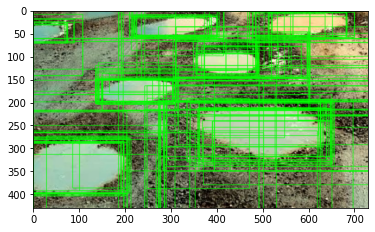

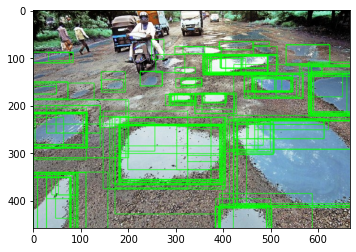

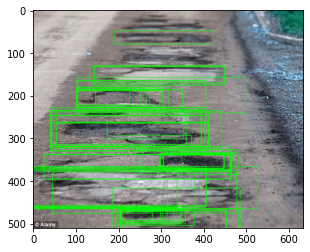

In [ ]:
import os
import cv2
from keras.models import load_model

model_final = load_model('/content/drive/MyDrive/temp/my_model1000-10.h5')

solutions_raw ={}


z=0
path_test = '/content/drive/MyDrive/Potholes'
for e,i in enumerate(os.listdir(path_test)):
    if i in ['16.jpg','17.jpg','36.jpg']:
      z += 1
      img = cv2.imread(os.path.join(path_test,i))
      ss.setBaseImage(img)
      ss.switchToSelectiveSearchFast()
      ssresults = ss.process()
      imout = img.copy()
      potential_boxes =[]
      for e,result in enumerate(ssresults):
          if e < 2000:
              x,y,w,h = result
              timage = imout[y:y+h,x:x+w]
              resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
              img = np.expand_dims(resized, axis=0)
              out= model_final.predict(img,verbose = 0)
              if out[0][0] > 0.70:
                  temp_allocation = [x,y,h,w]
                  potential_boxes.append(temp_allocation)
      solutions_raw[i] = potential_boxes
      potential_boxes = nms(potential_boxes, 200)
      for box in potential_boxes:
        x,y,h,w = box
        cv2.rectangle(imout, (x, y), (x+w, y+h), (0, 255, 0), 1, cv2.LINE_AA)

      plt.figure()
      plt.imshow(imout)
        

In [ ]:
solutions_raw_backup = {'16.jpg': [[0, 288, 115, 197],
  [485, 4, 55, 197],
  [0, 0, 152, 310],
  [358, 213, 105, 285],
  [420, 71, 74, 114],
  [101, 281, 111, 108],
  [0, 275, 124, 204],
  [361, 215, 103, 269],
  [273, 227, 203, 457],
  [361, 218, 96, 261],
  [220, 14, 43, 168],
  [0, 30, 41, 73],
  [478, 0, 70, 252],
  [349, 68, 78, 235],
  [355, 76, 63, 134],
  [150, 149, 49, 154],
  [142, 149, 50, 163],
  [144, 149, 49, 161],
  [0, 286, 113, 191],
  [512, 0, 62, 218],
  [362, 214, 104, 265],
  [361, 218, 116, 290],
  [0, 25, 46, 69],
  [221, 10, 45, 167],
  [0, 279, 151, 213],
  [0, 285, 145, 198],
  [142, 149, 49, 168],
  [136, 152, 48, 124],
  [0, 30, 41, 75],
  [355, 93, 46, 134],
  [217, 17, 37, 162],
  [566, 0, 70, 164],
  [0, 32, 39, 73],
  [151, 151, 47, 153],
  [220, 14, 43, 180],
  [0, 288, 111, 204],
  [0, 26, 116, 108],
  [0, 266, 164, 341],
  [305, 57, 91, 298],
  [192, 0, 61, 224],
  [361, 213, 105, 286],
  [0, 183, 247, 625],
  [429, 194, 155, 301],
  [152, 149, 49, 152],
  [217, 0, 58, 184],
  [492, 229, 120, 238],
  [192, 0, 148, 538],
  [0, 176, 254, 730],
  [0, 285, 118, 198],
  [502, 153, 186, 228],
  [0, 289, 107, 191],
  [290, 230, 200, 440],
  [286, 197, 233, 444],
  [361, 211, 114, 278],
  [355, 93, 45, 134],
  [390, 241, 93, 261],
  [391, 240, 89, 260],
  [355, 93, 45, 133],
  [342, 202, 132, 309],
  [243, 215, 215, 487],
  [371, 254, 125, 359],
  [217, 13, 45, 184],
  [136, 151, 52, 168],
  [485, 0, 59, 215],
  [136, 136, 67, 174],
  [577, 198, 41, 49],
  [362, 214, 115, 289],
  [286, 227, 203, 444],
  [0, 313, 117, 268],
  [479, 0, 125, 251],
  [0, 0, 68, 384],
  [317, 120, 172, 413],
  [217, 17, 41, 162],
  [373, 79, 67, 211],
  [0, 281, 149, 268],
  [142, 149, 49, 162],
  [149, 151, 47, 156],
  [503, 0, 125, 227],
  [577, 198, 41, 59],
  [139, 145, 59, 171],
  [373, 67, 79, 224],
  [467, 2, 140, 136],
  [291, 197, 99, 335],
  [139, 151, 53, 166],
  [0, 288, 142, 197],
  [210, 13, 45, 191],
  [0, 266, 164, 353],
  [243, 164, 266, 487],
  [485, 14, 48, 197],
  [136, 120, 83, 174],
  [0, 20, 51, 90],
  [361, 200, 134, 290],
  [142, 149, 55, 163],
  [355, 95, 49, 133],
  [0, 262, 168, 619],
  [311, 64, 63, 176],
  [485, 0, 62, 245],
  [355, 89, 55, 133],
  [485, 4, 51, 197],
  [0, 289, 108, 191],
  [136, 149, 49, 174],
  [420, 47, 98, 178],
  [192, 10, 51, 160],
  [0, 0, 61, 415],
  [0, 286, 113, 192],
  [243, 2, 150, 276],
  [166, 136, 43, 144],
  [0, 281, 116, 209],
  [139, 127, 77, 171],
  [471, 4, 51, 211],
  [311, 67, 61, 173],
  [142, 114, 90, 168],
  [373, 0, 142, 357],
  [136, 149, 49, 168],
  [217, 13, 41, 184],
  [527, 176, 174, 203],
  [0, 26, 45, 88],
  [342, 202, 70, 279],
  [373, 54, 161, 230],
  [0, 276, 116, 209],
  [395, 153, 196, 335],
  [358, 93, 45, 133],
  [236, 2, 150, 283],
  [136, 132, 66, 174],
  [221, 10, 45, 179],
  [471, 0, 70, 259],
  [136, 152, 51, 154],
  [149, 145, 53, 161],
  [530, 107, 323, 200],
  [284, 164, 185, 446],
  [273, 197, 233, 457],
  [311, 36, 179, 289],
  [0, 26, 45, 73],
  [373, 79, 67, 189],
  [276, 199, 231, 454],
  [311, 36, 95, 135],
  [355, 82, 56, 133],
  [210, 0, 58, 195],
  [224, 14, 41, 160],
  [0, 265, 138, 204],
  [0, 265, 165, 204],
  [0, 0, 62, 415],
  [561, 0, 62, 169],
  [0, 279, 120, 205],
  [284, 154, 195, 446],
  [291, 197, 128, 357],
  [136, 151, 49, 168],
  [479, 3, 59, 173],
  [358, 67, 63, 199],
  [349, 68, 59, 140],
  [0, 26, 45, 75],
  [187, 0, 99, 228],
  [485, 4, 51, 215],
  [291, 197, 142, 357],
  [0, 183, 247, 651],
  [0, 0, 68, 415],
  [150, 149, 49, 160],
  [362, 197, 132, 289],
  [395, 194, 155, 335],
  [226, 0, 145, 321],
  [214, 14, 48, 186],
  [514, 0, 100, 216],
  [566, 0, 61, 164],
  [395, 229, 120, 335],
  [186, 0, 430, 544],
  [86, 279, 107, 119],
  [29, 273, 157, 257],
  [305, 57, 89, 187],
  [214, 0, 87, 318],
  [248, 191, 196, 223],
  [367, 78, 70, 236],
  [196, 0, 349, 534],
  [0, 221, 209, 278],
  [514, 6, 49, 170],
  [273, 197, 233, 424],
  [276, 120, 310, 454],
  [0, 18, 124, 108],
  [311, 36, 110, 181],
  [276, 197, 100, 357],
  [514, 0, 125, 216],
  [485, 4, 55, 215],
  [311, 67, 79, 286],
  [311, 47, 153, 291],
  [221, 10, 48, 167],
  [311, 36, 102, 174],
  [290, 164, 185, 440],
  [0, 183, 247, 309],
  [311, 67, 95, 286],
  [224, 13, 48, 176],
  [335, 198, 131, 316],
  [361, 215, 134, 369],
  [0, 286, 144, 205],
  [276, 197, 121, 379],
  [248, 164, 266, 482],
  [150, 149, 69, 165],
  [0, 199, 231, 730],
  [335, 198, 79, 213],
  [291, 197, 128, 348],
  [210, 0, 58, 191],
  [369, 240, 89, 282],
  [150, 137, 81, 165],
  [192, 0, 148, 411],
  [492, 0, 430, 238],
  [0, 266, 164, 502],
  [276, 197, 121, 371],
  [492, 153, 277, 238],
  [0, 128, 122, 315],
  [478, 8, 56, 158],
  [0, 276, 121, 209],
  [217, 0, 58, 188],
  [273, 36, 394, 457],
  [311, 64, 81, 176],
  [291, 197, 142, 365],
  [0, 9, 133, 108],
  [0, 219, 180, 204],
  [284, 153, 196, 446],
  [335, 193, 136, 316],
  [0, 217, 213, 730],
  [0, 217, 213, 286],
  [521, 0, 50, 209]],
 '17.jpg': [[0, 352, 106, 76],
  [579, 109, 114, 88],
  [184, 225, 131, 220],
  [390, 412, 46, 112],
  [324, 249, 56, 79],
  [0, 155, 21, 49],
  [182, 241, 119, 218],
  [579, 136, 80, 81],
  [289, 178, 14, 42],
  [444, 135, 45, 116],
  [449, 231, 180, 218],
  [460, 141, 31, 86],
  [225, 128, 31, 47],
  [466, 144, 27, 80],
  [586, 132, 87, 81],
  [390, 412, 46, 106],
  [47, 344, 93, 44],
  [297, 175, 14, 44],
  [0, 350, 108, 79],
  [464, 66, 8, 33],
  [0, 88, 22, 84],
  [286, 175, 24, 55],
  [139, 223, 23, 62],
  [28, 345, 51, 58],
  [300, 143, 20, 42],
  [392, 409, 49, 104],
  [298, 76, 16, 63],
  [0, 239, 219, 421],
  [249, 61, 42, 26],
  [0, 351, 107, 80],
  [0, 160, 16, 49],
  [0, 215, 72, 114],
  [0, 214, 76, 114],
  [590, 139, 77, 77],
  [302, 244, 91, 101],
  [48, 200, 58, 93],
  [28, 200, 58, 113],
  [508, 145, 24, 38],
  [590, 134, 79, 77],
  [0, 215, 73, 113],
  [395, 96, 26, 98],
  [0, 152, 34, 73],
  [463, 141, 30, 80],
  [0, 341, 117, 111],
  [423, 232, 71, 82],
  [166, 225, 139, 208],
  [180, 242, 122, 213],
  [311, 142, 19, 44],
  [532, 72, 44, 92],
  [0, 217, 66, 110],
  [311, 146, 11, 43],
  [366, 102, 33, 39],
  [394, 416, 42, 97],
  [286, 175, 20, 55],
  [325, 241, 77, 79],
  [396, 96, 26, 98],
  [428, 233, 177, 239],
  [0, 344, 114, 91],
  [291, 176, 16, 50],
  [340, 177, 40, 82],
  [585, 119, 102, 82],
  [585, 139, 77, 82],
  [4, 218, 64, 101],
  [172, 285, 143, 226],
  [0, 351, 107, 79],
  [430, 240, 44, 54],
  [286, 176, 15, 55],
  [366, 93, 43, 146],
  [473, 229, 11, 138],
  [0, 206, 108, 112],
  [311, 146, 10, 44],
  [422, 228, 42, 190],
  [392, 66, 17, 70],
  [258, 93, 38, 61],
  [181, 240, 120, 215],
  [371, 96, 37, 122],
  [0, 216, 67, 112],
  [585, 116, 100, 82],
  [0, 345, 113, 86],
  [429, 237, 66, 76],
  [383, 412, 46, 119],
  [452, 232, 38, 47],
  [430, 232, 182, 237],
  [184, 242, 117, 211],
  [0, 351, 107, 78],
  [564, 118, 12, 44],
  [147, 212, 163, 178],
  [355, 174, 43, 73],
  [361, 175, 18, 46],
  [560, 113, 25, 47],
  [582, 132, 89, 85],
  [428, 239, 61, 79],
  [366, 96, 40, 127],
  [579, 109, 108, 88],
  [315, 77, 14, 81],
  [303, 176, 13, 32],
  [366, 101, 34, 81],
  [384, 396, 62, 116],
  [9, 341, 117, 102],
  [366, 94, 41, 149],
  [464, 76, 17, 49],
  [466, 232, 60, 201],
  [184, 243, 113, 209],
  [366, 101, 34, 71],
  [0, 188, 122, 195],
  [372, 96, 34, 121],
  [360, 96, 36, 133],
  [298, 120, 12, 43],
  [476, 228, 12, 136],
  [441, 96, 25, 52],
  [172, 241, 126, 232],
  [462, 140, 32, 84],
  [344, 175, 26, 60],
  [470, 144, 26, 76],
  [357, 93, 37, 155],
  [0, 200, 88, 141],
  [297, 175, 24, 44],
  [466, 132, 53, 102],
  [144, 146, 21, 46],
  [363, 96, 37, 130],
  [180, 243, 112, 212],
  [392, 414, 44, 99],
  [399, 229, 68, 100],
  [360, 96, 37, 134],
  [360, 101, 32, 78],
  [394, 412, 46, 102],
  [189, 236, 60, 67],
  [375, 96, 34, 118],
  [172, 225, 148, 231],
  [311, 146, 11, 44],
  [9, 344, 114, 82],
  [582, 134, 79, 85],
  [357, 96, 34, 136],
  [383, 412, 46, 113],
  [53, 341, 47, 41],
  [481, 144, 28, 61],
  [413, 232, 182, 254],
  [392, 385, 73, 195],
  [452, 228, 42, 160],
  [584, 128, 93, 83],
  [444, 140, 29, 79],
  [355, 174, 21, 51],
  [39, 341, 47, 55],
  [366, 96, 39, 127],
  [32, 89, 17, 52],
  [278, 177, 23, 57],
  [161, 225, 151, 243],
  [586, 118, 101, 81],
  [532, 73, 39, 92],
  [173, 301, 66, 225],
  [462, 140, 32, 80],
  [0, 150, 36, 73],
  [0, 214, 75, 112],
  [391, 66, 17, 71],
  [460, 135, 37, 86],
  [422, 114, 292, 245],
  [289, 178, 21, 42],
  [340, 174, 43, 82],
  [452, 134, 49, 114],
  [289, 176, 15, 46],
  [422, 228, 64, 245],
  [444, 135, 35, 102],
  [73, 153, 35, 55],
  [28, 345, 113, 58],
  [357, 174, 19, 46],
  [0, 88, 23, 76],
  [460, 135, 36, 86],
  [395, 96, 26, 99],
  [340, 177, 31, 84],
  [143, 129, 43, 51],
  [408, 221, 71, 259],
  [393, 96, 25, 100],
  [225, 129, 30, 46],
  [0, 225, 65, 64],
  [357, 96, 39, 137],
  [0, 340, 118, 157],
  [360, 95, 37, 152],
  [0, 218, 64, 105],
  [199, 225, 110, 204],
  [579, 132, 50, 72],
  [444, 140, 32, 98],
  [511, 142, 41, 43],
  [392, 407, 51, 99],
  [383, 414, 44, 108],
  [28, 341, 117, 66],
  [444, 132, 53, 124],
  [181, 225, 140, 223],
  [181, 240, 125, 215],
  [357, 93, 43, 155],
  [413, 233, 61, 60],
  [0, 188, 122, 201],
  [0, 341, 117, 94],
  [466, 229, 22, 155]],
 '36.jpg': [[194, 469, 31, 162],
  [102, 180, 42, 148],
  [204, 465, 31, 142],
  [206, 471, 21, 92],
  [104, 184, 43, 200],
  [304, 336, 34, 143],
  [104, 186, 47, 246],
  [54, 262, 58, 356],
  [304, 336, 34, 142],
  [0, 376, 84, 404],
  [186, 416, 94, 298],
  [146, 186, 41, 158],
  [41, 247, 82, 352],
  [0, 367, 95, 337],
  [297, 339, 34, 164],
  [102, 157, 83, 395],
  [207, 469, 35, 170],
  [41, 264, 50, 352],
  [0, 373, 84, 405],
  [173, 264, 37, 179],
  [41, 246, 83, 371],
  [204, 469, 31, 142],
  [41, 264, 65, 371],
  [25, 337, 58, 448],
  [102, 180, 42, 124],
  [102, 188, 39, 194],
  [102, 180, 49, 215],
  [0, 370, 92, 337],
  [204, 470, 22, 75],
  [45, 378, 97, 431],
  [104, 186, 41, 200],
  [206, 467, 25, 150],
  [257, 319, 54, 204],
  [202, 465, 45, 249],
  [102, 188, 39, 164],
  [299, 335, 35, 148],
  [25, 337, 58, 438],
  [102, 187, 40, 194],
  [204, 469, 31, 109],
  [204, 470, 26, 142],
  [0, 370, 90, 404],
  [43, 235, 83, 351],
  [197, 293, 36, 173],
  [204, 465, 27, 99],
  [0, 366, 91, 405],
  [143, 130, 45, 289],
  [202, 470, 40, 249],
  [305, 335, 35, 142],
  [25, 338, 57, 436],
  [132, 132, 38, 317],
  [207, 469, 41, 245],
  [104, 164, 69, 299],
  [295, 336, 34, 151],
  [104, 186, 41, 168],
  [102, 180, 42, 194],
  [146, 186, 47, 204],
  [54, 262, 57, 357],
  [0, 373, 87, 404],
  [0, 366, 98, 524],
  [297, 337, 36, 164],
  [204, 464, 36, 142],
  [102, 180, 47, 194],
  [0, 376, 84, 314],
  [304, 336, 40, 159],
  [305, 333, 40, 160],
  [348, 333, 51, 131],
  [194, 469, 41, 258],
  [43, 246, 68, 315],
  [204, 470, 26, 124],
  [240, 326, 58, 239],
  [295, 336, 40, 168],
  [0, 367, 98, 379],
  [191, 48, 31, 231],
  [240, 326, 47, 225],
  [204, 465, 45, 247],
  [41, 246, 83, 352],
  [104, 165, 62, 300],
  [54, 235, 85, 356],
  [43, 235, 84, 397],
  [143, 130, 40, 305],
  [41, 246, 83, 361],
  [143, 132, 43, 305],
  [202, 465, 31, 144],
  [41, 238, 91, 361],
  [43, 235, 88, 397],
  [202, 465, 45, 278],
  [43, 235, 84, 351],
  [41, 228, 101, 361]]}


solutions_raw

{'16.jpg': [[0, 288, 115, 197],
  [485, 4, 55, 197],
  [0, 0, 152, 310],
  [358, 213, 105, 285],
  [420, 71, 74, 114],
  [101, 281, 111, 108],
  [0, 275, 124, 204],
  [361, 215, 103, 269],
  [273, 227, 203, 457],
  [361, 218, 96, 261],
  [220, 14, 43, 168],
  [0, 30, 41, 73],
  [478, 0, 70, 252],
  [349, 68, 78, 235],
  [355, 76, 63, 134],
  [150, 149, 49, 154],
  [142, 149, 50, 163],
  [144, 149, 49, 161],
  [0, 286, 113, 191],
  [512, 0, 62, 218],
  [362, 214, 104, 265],
  [361, 218, 116, 290],
  [0, 25, 46, 69],
  [221, 10, 45, 167],
  [0, 279, 151, 213],
  [0, 285, 145, 198],
  [142, 149, 49, 168],
  [136, 152, 48, 124],
  [0, 30, 41, 75],
  [355, 93, 46, 134],
  [217, 17, 37, 162],
  [566, 0, 70, 164],
  [0, 32, 39, 73],
  [151, 151, 47, 153],
  [220, 14, 43, 180],
  [0, 288, 111, 204],
  [0, 26, 116, 108],
  [0, 266, 164, 341],
  [305, 57, 91, 298],
  [192, 0, 61, 224],
  [361, 213, 105, 286],
  [0, 183, 247, 625],
  [429, 194, 155, 301],
  [152, 149, 49, 152],
  [217, 0, 58, 184

**bold text**# testing 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


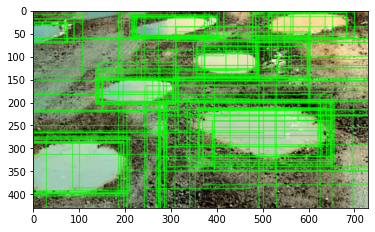

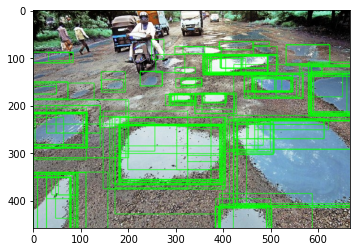

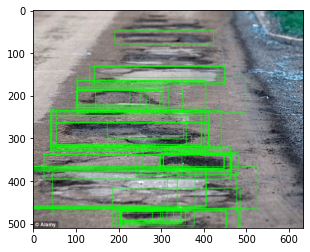

In [ ]:
path_test = '/content/drive/MyDrive/Potholes'
for e,i in enumerate(os.listdir(path_test)):
    if i in ['16.jpg','17.jpg','36.jpg']:
        img = cv2.imread(os.path.join(path_test,i))
        imout = img.copy()
        potential_boxes = solutions_raw[i]
        for box in potential_boxes:
              x,y,h,w = box
              cv2.rectangle(imout, (x, y), (x+w, y+h), (0, 255, 0), 1, cv2.LINE_AA)

        plt.figure()
        plt.imshow(imout)

9
22
8


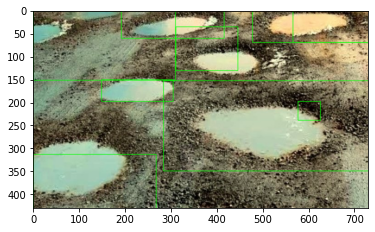

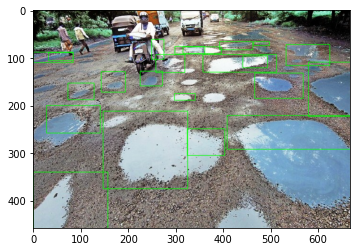

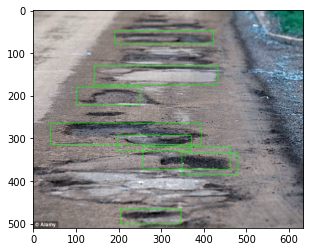

In [ ]:
path_test = '/content/drive/MyDrive/Potholes'
for e,i in enumerate(os.listdir(path_test)):
    if i in ['16.jpg','17.jpg','36.jpg']:
        img = cv2.imread(os.path.join(path_test,i))
        imout = img.copy()
        potential_boxes = nms(solutions_raw[i],0.02)
        print(len(potential_boxes))
        for box in potential_boxes:
              x,y,h,w = box
              cv2.rectangle(imout, (x, y), (x+w, y+h), (0, 255, 0), 1, cv2.LINE_AA)

        plt.figure()
        plt.imshow(imout)

7
22
7


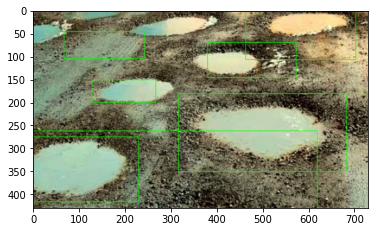

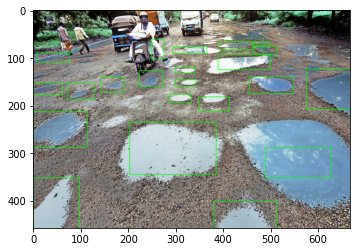

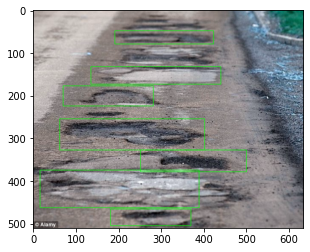

In [ ]:
path_test = '/content/drive/MyDrive/Potholes'
for e,i in enumerate(os.listdir(path_test)):
    if i in ['16.jpg','17.jpg','36.jpg']:
        img = cv2.imread(os.path.join(path_test,i))
        imout = img.copy()
        potential_boxes = merge_boxes(solutions_raw[i],200)
        print(len(potential_boxes))
        for box in potential_boxes:
              x,y,h,w = box
              cv2.rectangle(imout, (x, y), (x+w, y+h), (0, 255, 0), 1, cv2.LINE_AA)

        plt.figure()
        plt.imshow(imout)

In [ ]:
# solutions_raw['16.jpg']

[[530, 107, 323, 200]]

### Faster Non-Maximum Suppression in Python

In [ ]:
def nms(boxes, overlap_thresh):
    # If there are no boxes, return an empty list
    if len(boxes) == 0:
        return []
    
    # Sort the boxes based on their y-coordinate, from top to bottom
    boxes = sorted(boxes, key=lambda x: x[1])
    
    # Initialize the list of picked boxes
    picked_boxes = []
    
    # Loop through all the boxes
    while len(boxes) > 0:
        # Select the box with the highest score and add it to the list of picked boxes
        best_box = boxes.pop(0)
        picked_boxes.append(best_box)
        
        # Calculate the intersection over union (IoU) of the best box with all the remaining boxes
        ious = []
        for box in boxes:
            iou = calculate_iou(best_box, box)
            ious.append(iou)
        
        # Remove all the boxes that have an IoU greater than the overlap threshold
        boxes_to_remove = []
        for i in range(len(ious)):
            if ious[i] > overlap_thresh:
                boxes_to_remove.append(i)
        boxes_to_remove.reverse() # Start removing from the end to avoid index errors
        for i in boxes_to_remove:
            boxes.pop(i)
    
    # Return the list of picked boxes
    return picked_boxes


def calculate_iou(box1, box2):
    # Calculate the coordinates of the intersection rectangle
    x_left = max(box1[0], box2[0])
    y_top = max(box1[1], box2[1])
    x_right = min(box1[0] + box1[2], box2[0] + box2[2])
    y_bottom = min(box1[1] + box1[3], box2[1] + box2[3])
    
    # If there is no intersection, return 0
    if x_right <= x_left or y_bottom <= y_top:
        return 0.0
    
    # Calculate the area of intersection and union
    intersection_area = (x_right - x_left) * (y_bottom - y_top)
    box1_area = box1[2] * box1[3]
    box2_area = box2[2] * box2[3]
    union_area = box1_area + box2_area - intersection_area
    
    # Calculate the IoU and return it
    iou = intersection_area / union_area
    return iou


### Merge boxs method 2

In [ ]:
## this is the best working function so far

def merge_boxes(boxes, threshold):
    n = len(boxes)
    selected = [False] * n
    new_boxes = []
    
    for i in range(n):
        if selected[i]:
            continue
        
        x1, y1, h1, w1 = boxes[i]
        cx1 = x1 + w1 / 2
        cy1 = y1 + h1 / 2
        sum_w = w1
        sum_h = h1
        count = 1
        overlap = False
        
        for j in range(i+1, n):
            if selected[j]:
                continue
            
            x2, y2, h2, w2 = boxes[j]
            cx2 = x2 + w2 / 2
            cy2 = y2 + h2 / 2
            
            if (x1 < x2 + w2 and x1 + w1 > x2 and y1 < y2 + h2 and y1 + h1 > y2):
                # boxes[i] and boxes[j] overlap
                overlap = True
                dist = ((cx1 - cx2) ** 2 + (cy1 - cy2) ** 2) ** 0.5
                
                if dist <= threshold:
                    sum_w += w2
                    sum_h += h2
                    count += 1
                    selected[j] = True
        
        new_box = [x1, y1, h1, w1]
        if overlap and count > 1:
            new_box[2] = int(sum_h / count)
            new_box[3] = int(sum_w / count)
            new_box[0] = int(cx1 - new_box[3] / 2)
            new_box[1] = int(cy1 - new_box[2] / 2)
        
        # Ensure non-negative coordinates
        new_box[0] = max(0, new_box[0])
        new_box[1] = max(0, new_box[1])
        new_box[2] = max(0, new_box[2])
        new_box[3] = max(0, new_box[3])
        
        new_boxes.append(new_box)
        selected[i] = True
    
    return new_boxes


In [ ]:
def merge_boxes(boxes, iou_threshold=0.5, center_threshold=10):
    merged_boxes = []
    num_boxes = len(boxes)

    for i in range(num_boxes):
        if i not in merged_boxes:
            box_i = boxes[i]
            (x_i, y_i, h_i, w_i) = box_i
            keep_i = True

            for j in range(i+1, num_boxes):
                if j not in merged_boxes:
                    box_j = boxes[j]
                    (x_j, y_j, h_j, w_j) = box_j

                    # check for overlap
                    x_overlap = max(0, min(x_i+w_i, x_j+w_j) - max(x_i, x_j))
                    y_overlap = max(0, min(y_i+h_i, y_j+h_j) - max(y_i, y_j))
                    overlap_area = x_overlap * y_overlap
                    iou = overlap_area / (h_i*w_i + h_j*w_j - overlap_area)

                    if iou < iou_threshold:
                        # no overlap, keep both boxes
                        continue
                    elif max(h_i*w_i, h_j*w_j) / min(h_i*w_i, h_j*w_j) > 4:
                        # boxes are not similar in shape, keep both
                        continue
                    else:
                        # check center distance
                        center_i = (x_i + w_i/2, y_i + h_i/2)
                        center_j = (x_j + w_j/2, y_j + h_j/2)
                        center_distance = ((center_i[0] - center_j[0])**2 + (center_i[1] - center_j[1])**2)**0.5

                        if center_distance < center_threshold:
                            # boxes point at same object, merge them
                            new_w = (w_i + w_j) / 2
                            new_h = (h_i + h_j) / 2
                            new_x = (x_i + x_j) / 2 - new_w/2
                            new_y = (y_i + y_j) / 2 - new_h/2
                            merged_boxes.append(i)
                            merged_boxes.append(j)
                            boxes.append([new_x, new_y, new_h, new_w])
                            keep_i = False
                        else:
                            # boxes are different objects, keep both
                            continue

            if keep_i:
                # box i was not merged, keep it
                merged_boxes.append(i)

    # return all boxes that were not merged or deleted
    return [boxes[i] for i in range(num_boxes) if i not in merged_boxes]


In [ ]:
import math

def merge_overlapping_boxes(boxes, threshold):
    new_boxes = []
    for box in boxes:
        # Calculate the coordinates of the box and its centroid
        x1, y1, h, w = box
        x2, y2 = x1 + w, y1 + h
        centroid_x, centroid_y = (x1 + x2) / 2, (y1 + y2) / 2

        # Find the overlapping boxes
        overlaps = []
        for new_box in new_boxes:
            new_x1, new_y1, new_h, new_w = new_box
            new_x2, new_y2 = new_x1 + new_w, new_y1 + new_h
            new_centroid_x, new_centroid_y = (new_x1 + new_x2) / 2, (new_y1 + new_y2) / 2

            # Check if the centroids are within the threshold distance
            distance = math.sqrt((centroid_x - new_centroid_x) ** 2 + (centroid_y - new_centroid_y) ** 2)
            if distance <= threshold:
                overlaps.append(new_box)

        # If there are no overlapping boxes, add the current box to the list
        if not overlaps:
            new_boxes.append(box)
        else:
            # Find the coordinates of the merged box
            boxes_to_merge = overlaps + [box]
            merged_x1 = min([b[0] for b in boxes_to_merge])
            merged_y1 = min([b[1] for b in boxes_to_merge])
            merged_x2 = max([b[0] + b[3] for b in boxes_to_merge])
            merged_y2 = max([b[1] + b[2] for b in boxes_to_merge])

            # Add the merged box to the list and remove the overlapping boxes
            merged_box = [merged_x1, merged_y1, merged_y2 - merged_y1, merged_x2 - merged_x1]
            new_boxes.append(merged_box)
            for overlap in overlaps:
                new_boxes.remove(overlap)

    return new_boxes


In [ ]:
z=0
path_test = '/content/drive/MyDrive/Potholes'
for e,i in enumerate(os.listdir(path_test)):
    if i in ['16.jpg','9.jpg','17.jpg']:
        z += 1
        img = cv2.imread(os.path.join(path_test,i))
        ss.setBaseImage(img)
        ss.switchToSelectiveSearchFast()
        ssresults = ss.process()
        imout = img.copy()
        for e,result in enumerate(ssresults):
            if e < 2000:
                x,y,w,h = result
                timage = imout[y:y+h,x:x+w]
                resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
                img = np.expand_dims(resized, axis=0)
                out= model_final.predict(img)
                if out[0][0] > 0.90:
                    cv2.rectangle(imout, (x, y), (x+w, y+h), (0, 255, 0), 1, cv2.LINE_AA)
        plt.figure()
        plt.imshow(imout)
        

In [ ]:
def IOU(box1, box2):
    x1, y1, w1, h1 = box1
    x2, y2, w2, h2 = box2
    w_intersection = min(x1 + w1, x2 + w2) - max(x1, x2)
    h_intersection = min(y1 + h1, y2 + h2) - max(y1, y2)
    if w_intersection <= 0 or h_intersection <= 0: 
        return 0
    I = w_intersection * h_intersection
    U = w1 * h1 + w2 * h2 - I 
    return I / U





```
# This is formatted as code
```

# Below session is for the IOU matrix VGG

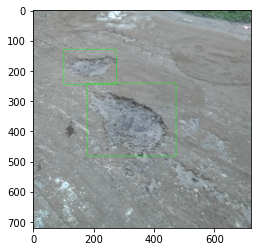

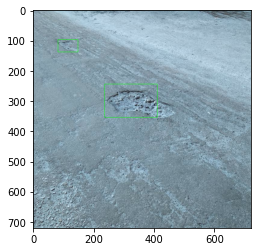

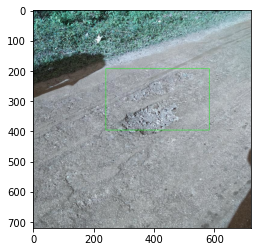

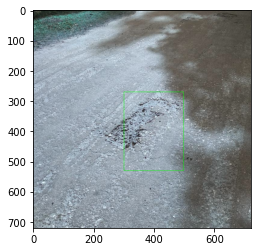

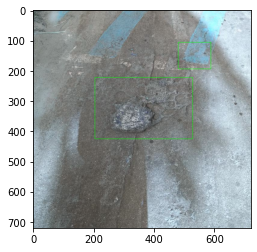

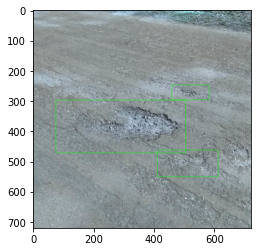

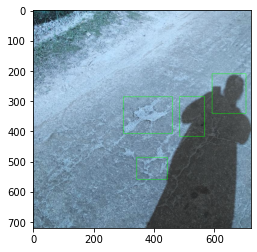

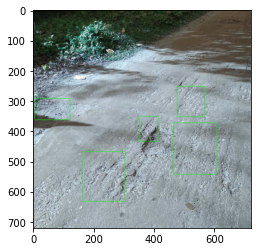

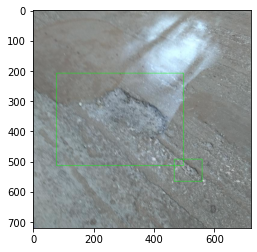

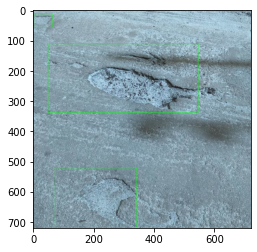

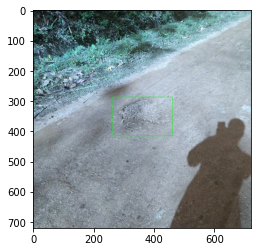

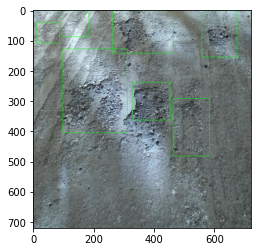

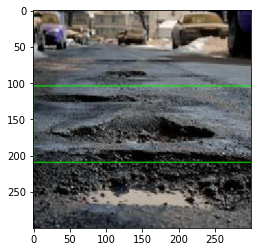

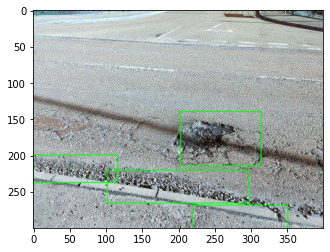

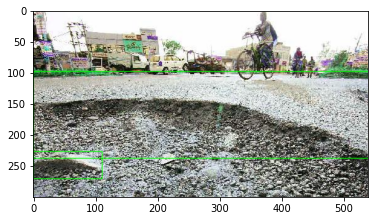

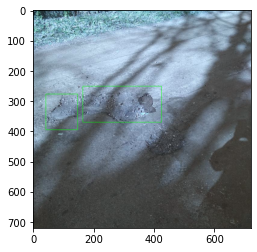

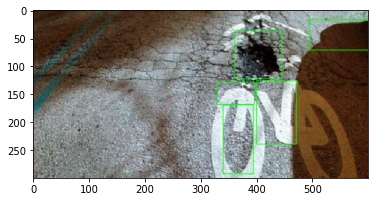

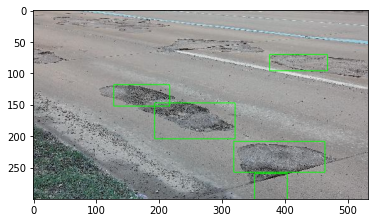

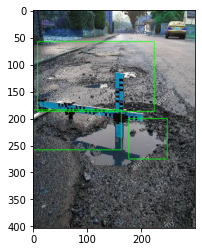

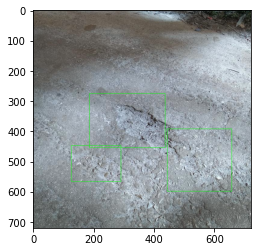

In [ ]:
import os
import cv2
from keras.models import load_model

model_final = load_model('/content/drive/MyDrive/temp/my_model1000-10.h5')

solutions_raw ={}


z=0
path_test = '/content/drive/MyDrive/Potholes/test'
for e,i in enumerate(os.listdir(path_test)):
    # if i in ['16.jpg','17.jpg','36.jpg','25.jpg','43.jpg','95.jpg']:
    if i in ['_annotations.csv']:
      continue
    z += 1
    if z> 20:
      break
    img = cv2.imread(os.path.join(path_test,i))
    ss.setBaseImage(img)
    ss.switchToSelectiveSearchFast()
    ssresults = ss.process()
    imout = img.copy()
    potential_boxes =[]
    for e,result in enumerate(ssresults):
        if e < 2000:
            x,y,w,h = result
            timage = imout[y:y+h,x:x+w]
            resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
            img = np.expand_dims(resized, axis=0)
            out= model_final.predict(img,verbose = 0)
            if out[0][0] > 0.70:
                temp_allocation = [x,y,h,w]
                potential_boxes.append(temp_allocation)
    solutions_raw[i] = potential_boxes
    potential_boxes = nms(potential_boxes, 0.02)
    for box in potential_boxes:
      x,y,h,w = box
      cv2.rectangle(imout, (x, y), (x+w, y+h), (0, 255, 0), 1, cv2.LINE_AA)

    plt.figure()
    plt.imshow(imout)
        

In [ ]:
# use this one for vgg

solutions_raw = {'img-195_jpg.rf.f77a8f4d432a9a89235168ff8e09a650.jpg': [[128, 269, 339, 539],
  [181, 263, 230, 259],
  [101, 130, 115, 174],
  [179, 269, 156, 284],
  [179, 267, 119, 261],
  [180, 270, 212, 292],
  [178, 241, 241, 294],
  [111, 151, 340, 352],
  [178, 241, 348, 294],
  [128, 272, 336, 539],
  [179, 267, 161, 283],
  [181, 263, 230, 291],
  [207, 272, 121, 233],
  [63, 144, 106, 213],
  [178, 263, 230, 294],
  [101, 130, 115, 182],
  [108, 149, 78, 170],
  [178, 263, 230, 262],
  [179, 269, 163, 379],
  [178, 267, 215, 294],
  [101, 130, 115, 180],
  [83, 327, 149, 174],
  [197, 241, 184, 265],
  [111, 151, 340, 329],
  [178, 267, 322, 294],
  [207, 272, 153, 256],
  [63, 144, 150, 256],
  [180, 270, 319, 292],
  [111, 151, 340, 370]],
 'img-168_jpg.rf.af3590e07b06b43e91fa53990ff94af3.jpg': [[236, 264, 51, 113],
  [244, 262, 116, 229],
  [236, 244, 110, 174],
  [236, 264, 51, 174],
  [236, 249, 133, 237],
  [337, 297, 65, 136],
  [344, 299, 83, 129],
  [82, 97, 41, 66],
  [236, 244, 138, 237],
  [236, 258, 92, 174],
  [244, 262, 100, 227],
  [236, 264, 118, 237],
  [236, 258, 124, 237],
  [237, 271, 105, 236],
  [233, 244, 138, 240],
  [236, 244, 115, 235],
  [233, 264, 38, 132],
  [236, 264, 79, 144],
  [237, 278, 98, 236],
  [236, 264, 118, 197],
  [329, 262, 100, 144],
  [233, 262, 54, 180],
  [278, 262, 54, 135],
  [329, 262, 100, 101],
  [278, 262, 47, 113],
  [233, 262, 117, 240],
  [233, 258, 124, 240],
  [233, 262, 114, 240],
  [329, 262, 117, 144],
  [236, 264, 79, 174],
  [236, 249, 94, 164],
  [237, 262, 117, 236],
  [236, 249, 94, 219]],
 'img-196_jpg.rf.c1e105382a0bb8d329959cea45173cdf.jpg': [[240, 296, 168, 254],
  [274, 303, 122, 220],
  [274, 303, 116, 220],
  [305, 300, 143, 188],
  [343, 224, 69, 114],
  [304, 301, 97, 193],
  [355, 301, 97, 142],
  [240, 300, 164, 254],
  [240, 193, 203, 342],
  [270, 296, 168, 224],
  [304, 325, 90, 113],
  [285, 325, 62, 135],
  [376, 300, 98, 121],
  [270, 300, 164, 224],
  [241, 300, 164, 253],
  [189, 193, 284, 438],
  [354, 300, 98, 143],
  [376, 301, 97, 121],
  [189, 296, 168, 304],
  [304, 322, 93, 105],
  [304, 300, 115, 193],
  [285, 321, 66, 135],
  [189, 220, 257, 308],
  [285, 325, 90, 132],
  [285, 322, 93, 151],
  [285, 296, 119, 212],
  [305, 296, 147, 188],
  [285, 300, 98, 212],
  [272, 296, 158, 225],
  [285, 322, 93, 132],
  [376, 296, 102, 121],
  [285, 301, 97, 212],
  [272, 300, 154, 225],
  [278, 300, 177, 219],
  [189, 193, 261, 437]],
 'img-107_jpg.rf.2e40485785f6e5e2efec404301b235c2.jpg': [[293, 282, 210, 204],
  [211, 318, 175, 224],
  [289, 320, 95, 118],
  [346, 291, 119, 148],
  [293, 292, 125, 204],
  [272, 318, 123, 137],
  [311, 291, 201, 186],
  [211, 318, 152, 224],
  [289, 319, 96, 140],
  [211, 318, 174, 224],
  [185, 296, 196, 244],
  [293, 283, 134, 204],
  [215, 284, 246, 283],
  [287, 318, 97, 120],
  [346, 284, 126, 152],
  [265, 284, 246, 233],
  [272, 318, 155, 137],
  [185, 309, 168, 244],
  [220, 342, 136, 157],
  [289, 319, 96, 118],
  [262, 309, 168, 167],
  [211, 334, 145, 165],
  [289, 309, 106, 140],
  [211, 333, 137, 143],
  [287, 318, 97, 148],
  [211, 360, 110, 143],
  [220, 342, 136, 134],
  [211, 318, 152, 196],
  [293, 282, 210, 205],
  [311, 282, 115, 186],
  [289, 284, 131, 209],
  [211, 334, 145, 147],
  [272, 318, 175, 137],
  [220, 369, 109, 134],
  [300, 270, 260, 197],
  [211, 318, 175, 198],
  [211, 333, 137, 164],
  [211, 333, 137, 186],
  [211, 318, 155, 198],
  [211, 282, 210, 287],
  [289, 309, 106, 118],
  [211, 334, 145, 151],
  [220, 282, 210, 278],
  [346, 270, 140, 148],
  [311, 282, 115, 187],
  [211, 334, 153, 165],
  [185, 309, 183, 244],
  [220, 342, 136, 154]],
 'img-245_jpg.rf.1c9b49a366bda1cf64dbfac2a946cd38.jpg': [[240, 279, 122, 224],
  [240, 282, 119, 224],
  [241, 282, 118, 223],
  [486, 139, 55, 101],
  [263, 281, 117, 178],
  [241, 282, 119, 223],
  [204, 276, 145, 199],
  [256, 320, 81, 208],
  [487, 134, 60, 92],
  [487, 134, 60, 96],
  [241, 282, 120, 223],
  [479, 106, 88, 108],
  [241, 272, 129, 223],
  [204, 222, 203, 323],
  [266, 276, 126, 137],
  [240, 282, 183, 224],
  [266, 276, 121, 137]],
 'img-238_jpg.rf.f146df7999e374dbeaba65f92c518159.jpg': [[283, 316, 156, 216],
  [309, 318, 154, 197],
  [309, 318, 100, 197],
  [123, 306, 166, 340],
  [458, 247, 49, 123],
  [362, 338, 47, 103],
  [298, 316, 49, 139],
  [171, 301, 171, 258],
  [298, 312, 54, 97],
  [410, 462, 88, 201],
  [462, 247, 49, 119],
  [160, 312, 148, 304],
  [410, 466, 77, 189],
  [286, 312, 159, 218],
  [160, 312, 148, 334],
  [219, 312, 139, 275],
  [123, 306, 166, 383],
  [188, 312, 148, 276],
  [394, 338, 80, 92],
  [219, 312, 139, 245],
  [410, 466, 90, 180],
  [75, 297, 174, 429],
  [309, 318, 69, 156],
  [410, 464, 94, 176],
  [123, 301, 171, 383],
  [171, 301, 171, 335],
  [351, 338, 47, 114],
  [369, 338, 79, 135],
  [123, 301, 139, 230],
  [369, 338, 80, 137],
  [410, 465, 93, 200],
  [188, 305, 166, 316],
  [362, 336, 51, 103],
  [318, 318, 100, 188],
  [309, 318, 92, 156],
  [410, 462, 81, 189],
  [369, 338, 79, 117],
  [394, 338, 80, 112],
  [318, 318, 115, 188],
  [298, 312, 54, 93],
  [298, 312, 105, 206],
  [298, 316, 156, 201],
  [236, 301, 171, 193],
  [351, 338, 55, 153],
  [362, 338, 80, 144],
  [369, 338, 47, 96],
  [188, 305, 166, 298],
  [369, 338, 49, 96],
  [351, 338, 53, 153],
  [410, 464, 94, 200],
  [110, 248, 224, 389],
  [75, 298, 173, 429],
  [75, 297, 144, 272],
  [298, 312, 81, 206],
  [309, 318, 92, 197]],
 'img-105_jpg.rf.3fe9dff3d1631e79ecb480ff403bcb86.jpg': [[298, 286, 121, 162],
  [298, 313, 94, 144],
  [591, 210, 131, 112],
  [484, 285, 132, 82],
  [342, 486, 73, 101],
  [334, 286, 102, 118],
  [298, 286, 121, 169],
  [342, 486, 73, 112]],
 'img-217_jpg.rf.20e267cdb167c43140e67ec9f5328040.jpg': [[464, 372, 170, 142],
  [5, 292, 70, 117],
  [351, 350, 83, 63],
  [320, 373, 95, 103],
  [274, 399, 139, 110],
  [351, 350, 83, 141],
  [355, 350, 83, 59],
  [261, 392, 148, 118],
  [476, 251, 101, 90],
  [274, 350, 194, 218],
  [345, 350, 83, 147],
  [178, 476, 155, 149],
  [163, 467, 164, 140],
  [302, 374, 100, 121],
  [302, 374, 97, 121],
  [298, 350, 194, 194],
  [320, 373, 108, 103],
  [256, 350, 196, 213],
  [320, 366, 115, 103],
  [302, 366, 108, 121],
  [298, 367, 177, 171],
  [298, 367, 179, 171],
  [0, 292, 99, 200],
  [223, 350, 320, 320],
  [465, 372, 169, 141],
  [274, 350, 288, 265],
  [274, 350, 196, 195],
  [219, 475, 217, 194]],
 'img-146_jpg.rf.61be25b3053a51f622a244980545df2b.jpg': [[140, 240, 220, 313],
  [159, 240, 220, 294],
  [466, 492, 73, 92],
  [159, 260, 200, 273],
  [159, 260, 200, 294],
  [140, 260, 200, 313],
  [77, 208, 305, 420]],
 'img-23_jpg.rf.e6aa0daf83e72ccbf1ea10eb6a6ab3bd.jpg': [[181, 175, 155, 339],
  [225, 183, 47, 65],
  [276, 228, 92, 221],
  [179, 190, 138, 402],
  [181, 133, 187, 456],
  [252, 550, 51, 83],
  [181, 177, 161, 386],
  [225, 183, 60, 97],
  [328, 133, 74, 136],
  [240, 190, 138, 341],
  [179, 186, 146, 435],
  [181, 175, 155, 325],
  [178, 542, 64, 157],
  [167, 548, 88, 183],
  [73, 521, 199, 269],
  [464, 255, 41, 150],
  [181, 175, 155, 424],
  [73, 521, 199, 305],
  [193, 207, 80, 120],
  [170, 183, 104, 326],
  [181, 130, 190, 456],
  [179, 194, 61, 97],
  [186, 191, 73, 104],
  [133, 176, 162, 481],
  [336, 237, 83, 231],
  [186, 195, 125, 311],
  [179, 190, 138, 435],
  [181, 175, 158, 424],
  [312, 228, 92, 185],
  [178, 542, 64, 140],
  [205, 183, 47, 85],
  [193, 191, 129, 374],
  [240, 191, 92, 141],
  [205, 183, 74, 85],
  [186, 191, 129, 381],
  [336, 237, 83, 155],
  [193, 191, 129, 244],
  [240, 133, 67, 221],
  [240, 191, 129, 197],
  [169, 130, 202, 468],
  [169, 130, 190, 468],
  [167, 548, 99, 211],
  [182, 186, 155, 432],
  [73, 521, 199, 270],
  [71, 521, 199, 307],
  [181, 176, 162, 433],
  [82, 529, 170, 296],
  [186, 183, 104, 188],
  [167, 548, 151, 211],
  [179, 186, 142, 435],
  [336, 231, 107, 278],
  [186, 191, 116, 195],
  [250, 553, 48, 86],
  [82, 548, 112, 296],
  [412, 237, 66, 155],
  [186, 195, 62, 92],
  [181, 177, 161, 433],
  [186, 203, 117, 311],
  [242, 186, 48, 162],
  [82, 548, 151, 296],
  [181, 130, 202, 456],
  [49, 111, 227, 496],
  [336, 231, 89, 231],
  [181, 176, 162, 386],
  [276, 228, 110, 338],
  [186, 191, 147, 428],
  [186, 189, 152, 428],
  [2, 12, 45, 61],
  [402, 223, 49, 142],
  [133, 175, 158, 472],
  [298, 133, 71, 163],
  [181, 133, 199, 456],
  [243, 175, 92, 195],
  [186, 183, 137, 311],
  [293, 133, 67, 168],
  [64, 521, 199, 359],
  [186, 191, 96, 195],
  [309, 231, 110, 305],
  [49, 111, 230, 591],
  [336, 231, 107, 231],
  [170, 183, 104, 204],
  [243, 175, 163, 302],
  [133, 175, 155, 472],
  [170, 183, 155, 444],
  [170, 183, 104, 375],
  [186, 186, 155, 428],
  [186, 189, 118, 358],
  [181, 183, 137, 316],
  [182, 191, 150, 432],
  [49, 111, 209, 448],
  [170, 175, 163, 444],
  [186, 191, 150, 428],
  [186, 191, 129, 428]],
 'img-161_jpg.rf.211541e7178a4a93ec0680f26b905427.jpg': [[292, 288, 117, 168],
  [257, 294, 108, 152],
  [263, 287, 128, 197],
  [276, 294, 108, 133],
  [232, 288, 117, 228],
  [276, 294, 90, 117],
  [293, 287, 128, 167],
  [295, 294, 108, 114],
  [239, 294, 108, 212],
  [254, 288, 117, 206],
  [263, 287, 128, 185],
  [277, 288, 117, 183],
  [296, 287, 128, 164],
  [263, 295, 120, 185]],
 'img-179_jpg.rf.8632eb0d9b75fefe144829e67b75015a.jpg': [[153, 203, 202, 158],
  [289, 303, 119, 112],
  [258, 334, 187, 176],
  [10, 40, 68, 77],
  [246, 15, 151, 146],
  [210, 203, 190, 104],
  [210, 203, 149, 104],
  [270, 243, 258, 184],
  [110, 149, 244, 195],
  [303, 254, 265, 143],
  [209, 203, 149, 102],
  [299, 305, 145, 147],
  [221, 186, 268, 128],
  [564, 44, 97, 99],
  [564, 44, 97, 111],
  [262, 0, 142, 201],
  [557, 0, 155, 116],
  [208, 265, 128, 95],
  [289, 254, 237, 163],
  [564, 44, 101, 111],
  [289, 332, 82, 73],
  [289, 254, 237, 162],
  [77, 155, 251, 228],
  [270, 247, 268, 186],
  [164, 190, 215, 150],
  [299, 243, 272, 155],
  [72, 275, 119, 129],
  [111, 203, 190, 203],
  [98, 275, 106, 104],
  [544, 0, 192, 176],
  [243, 0, 137, 197],
  [221, 180, 274, 145],
  [564, 43, 111, 111],
  [270, 243, 272, 184],
  [564, 43, 98, 106],
  [253, 5, 132, 135],
  [559, 41, 135, 116],
  [240, 0, 142, 203],
  [270, 247, 254, 186],
  [299, 254, 247, 157],
  [88, 0, 88, 96],
  [268, 238, 281, 227],
  [88, 0, 88, 101],
  [297, 303, 115, 104],
  [182, 190, 215, 116],
  [253, 5, 142, 181],
  [332, 252, 198, 124],
  [301, 247, 203, 155],
  [77, 149, 325, 228],
  [240, 0, 96, 166],
  [299, 254, 247, 155],
  [243, 0, 109, 229],
  [564, 43, 106, 106],
  [76, 147, 88, 67],
  [303, 254, 265, 148],
  [221, 180, 274, 142],
  [270, 254, 265, 176],
  [559, 41, 114, 107],
  [183, 203, 190, 131],
  [243, 0, 136, 229],
  [334, 247, 192, 161],
  [209, 203, 202, 102],
  [559, 41, 114, 116],
  [299, 254, 261, 155],
  [110, 203, 149, 219],
  [462, 292, 190, 120],
  [253, 0, 142, 210],
  [77, 275, 119, 125],
  [560, 46, 109, 113],
  [327, 247, 140, 124],
  [210, 203, 159, 104],
  [253, 5, 132, 181],
  [258, 334, 193, 176],
  [289, 247, 280, 167],
  [299, 254, 261, 157],
  [253, 5, 142, 135],
  [88, 275, 119, 114],
  [98, 128, 277, 213],
  [240, 0, 136, 166],
  [211, 229, 123, 87],
  [241, 0, 137, 199],
  [299, 243, 258, 155],
  [164, 225, 127, 165],
  [91, 275, 119, 110],
  [270, 243, 276, 293],
  [110, 203, 195, 219],
  [219, 225, 83, 110],
  [196, 203, 190, 118],
  [299, 305, 95, 84],
  [270, 254, 247, 186],
  [301, 244, 206, 155],
  [270, 243, 276, 182],
  [289, 334, 88, 112],
  [270, 243, 276, 181],
  [124, 114, 413, 310],
  [327, 238, 125, 125],
  [212, 225, 127, 117],
  [212, 203, 149, 117],
  [270, 243, 276, 176],
  [297, 303, 114, 104],
  [246, 15, 97, 146],
  [454, 292, 190, 128],
  [327, 238, 212, 168],
  [219, 225, 87, 110],
  [275, 15, 151, 117],
  [212, 225, 127, 88],
  [327, 238, 212, 125],
  [299, 247, 268, 157],
  [332, 252, 135, 119],
  [299, 293, 121, 84],
  [327, 247, 140, 129],
  [106, 275, 119, 95],
  [297, 334, 88, 104],
  [332, 252, 135, 124],
  [212, 225, 87, 117],
  [246, 23, 89, 146],
  [147, 132, 261, 178],
  [166, 190, 215, 132],
  [182, 190, 162, 116],
  [164, 225, 173, 165],
  [299, 293, 157, 147],
  [77, 92, 306, 271],
  [299, 305, 109, 84],
  [327, 247, 203, 129],
  [212, 203, 149, 88],
  [270, 254, 265, 181],
  [166, 190, 215, 148],
  [327, 247, 244, 129],
  [117, 190, 215, 197],
  [124, 114, 284, 205],
  [161, 203, 202, 150],
  [124, 113, 341, 242],
  [117, 190, 103, 197],
  [77, 203, 195, 252],
  [164, 203, 195, 165],
  [72, 180, 325, 291],
  [117, 190, 105, 197],
  [312, 247, 280, 144],
  [88, 128, 403, 223],
  [77, 128, 403, 234],
  [124, 114, 317, 237],
  [268, 293, 226, 178],
  [268, 220, 342, 310],
  [124, 113, 406, 322]],
 'img-300_jpg.rf.6b7b035dff1cda092ce3dc22be8d0135.jpg': [[0, 149, 151, 300],
  [0, 144, 42, 264],
  [144, 151, 42, 107],
  [24, 159, 25, 242],
  [0, 114, 87, 300],
  [0, 154, 48, 300],
  [0, 113, 89, 300],
  [0, 144, 156, 300],
  [24, 154, 30, 240],
  [0, 166, 134, 300],
  [0, 189, 111, 300],
  [0, 167, 133, 300],
  [19, 149, 44, 232],
  [65, 144, 42, 199],
  [0, 113, 15, 120],
  [114, 117, 83, 186],
  [0, 150, 150, 300],
  [144, 148, 45, 107],
  [0, 187, 113, 257],
  [0, 114, 186, 300],
  [0, 144, 156, 273],
  [0, 114, 88, 300],
  [23, 149, 44, 228],
  [0, 149, 151, 273],
  [0, 110, 91, 300],
  [0, 154, 146, 273],
  [0, 190, 110, 300],
  [0, 104, 105, 300],
  [0, 148, 152, 300],
  [23, 148, 45, 228],
  [0, 141, 60, 300],
  [0, 141, 45, 264],
  [0, 169, 131, 300],
  [0, 112, 188, 300]],
 'img-308_jpg.rf.454dbf8eb0253ddef84789d3e67290c5.jpg': [[180, 149, 72, 143],
  [209, 237, 33, 106],
  [193, 141, 82, 157],
  [193, 148, 77, 157],
  [171, 244, 56, 182],
  [195, 149, 71, 128],
  [193, 148, 75, 157],
  [22, 215, 42, 150],
  [201, 155, 43, 93],
  [220, 268, 32, 131],
  [0, 213, 49, 174],
  [19, 213, 49, 155],
  [139, 224, 47, 180],
  [123, 239, 18, 48],
  [171, 240, 60, 182],
  [43, 211, 47, 178],
  [195, 149, 72, 128],
  [180, 149, 68, 100],
  [185, 155, 53, 153],
  [0, 203, 59, 174],
  [43, 211, 47, 158],
  [139, 224, 42, 157],
  [0, 211, 51, 174],
  [43, 211, 59, 272],
  [196, 153, 41, 83],
  [185, 155, 43, 109],
  [203, 153, 41, 76],
  [0, 202, 59, 264],
  [0, 202, 55, 172],
  [180, 149, 71, 143],
  [0, 215, 48, 182],
  [8, 207, 40, 177],
  [0, 207, 56, 182],
  [43, 211, 47, 210],
  [8, 207, 50, 177],
  [102, 220, 45, 196],
  [88, 220, 51, 227],
  [0, 199, 65, 277],
  [43, 211, 62, 182],
  [0, 199, 38, 116],
  [203, 139, 75, 111],
  [102, 220, 45, 183],
  [173, 139, 78, 141],
  [0, 203, 59, 253],
  [0, 199, 60, 252],
  [0, 207, 56, 253],
  [185, 153, 55, 153],
  [0, 199, 58, 185],
  [43, 211, 60, 272],
  [176, 153, 66, 162],
  [102, 220, 51, 213],
  [176, 148, 71, 118],
  [176, 148, 87, 173],
  [176, 153, 69, 162],
  [0, 199, 72, 230]],
 'img-343_jpg.rf.64b8e5ed7aa9153427c52de5812b3ab2.jpg': [[0, 127, 118, 341],
  [169, 169, 131, 371],
  [54, 231, 21, 63],
  [0, 140, 105, 300],
  [0, 226, 44, 111],
  [0, 122, 82, 307],
  [0, 140, 104, 492],
  [0, 124, 146, 492],
  [0, 140, 102, 491],
  [0, 226, 53, 132],
  [45, 193, 107, 495],
  [0, 97, 140, 540],
  [0, 124, 176, 540],
  [0, 231, 40, 117],
  [0, 122, 178, 540],
  [0, 140, 42, 250],
  [0, 100, 200, 540],
  [0, 140, 146, 300],
  [0, 131, 113, 492],
  [0, 140, 160, 540],
  [0, 98, 132, 540]],
 'img-42_jpg.rf.532fb8eb05b1efc570c5e4165e614201.jpg': [[337, 275, 68, 69],
  [164, 251, 119, 260],
  [164, 251, 119, 242],
  [324, 273, 87, 96],
  [326, 273, 87, 94],
  [42, 281, 105, 133],
  [347, 273, 70, 59],
  [40, 279, 107, 135],
  [42, 277, 118, 105],
  [337, 267, 74, 69],
  [27, 251, 136, 397],
  [337, 272, 71, 69],
  [40, 277, 118, 107]],
 'img-371_jpg.rf.a893e0bdc6fda0ba1b2a7f07d56cec23.jpg': [[340, 162, 130, 54],
  [340, 171, 121, 54],
  [495, 17, 54, 105],
  [495, 21, 50, 105],
  [356, 146, 154, 61],
  [340, 162, 130, 50],
  [340, 162, 133, 57],
  [317, 139, 161, 71],
  [405, 133, 106, 59],
  [340, 169, 123, 54],
  [340, 164, 128, 54],
  [400, 126, 113, 71],
  [340, 162, 133, 54],
  [340, 162, 130, 55],
  [361, 37, 85, 84],
  [340, 161, 131, 54],
  [329, 128, 40, 67],
  [344, 37, 110, 117],
  [355, 61, 71, 91],
  [340, 162, 130, 56]],
 'img-397_jpg.rf.a566bd12530cf6093cd6329a2b4c9e7d.jpg': [[128, 118, 34, 89],
  [323, 213, 42, 142],
  [376, 70, 26, 92],
  [105, 118, 34, 112],
  [117, 122, 71, 156],
  [352, 259, 41, 52],
  [160, 138, 44, 120],
  [319, 208, 49, 145],
  [105, 119, 49, 145],
  [193, 147, 57, 128]],
 'img-336_jpg.rf.eeafb6921ceff278aa8e24afe9f78f8a.jpg': [[166, 204, 74, 82],
  [165, 204, 99, 83],
  [0, 71, 122, 154],
  [120, 200, 90, 128],
  [166, 206, 68, 81],
  [167, 208, 70, 81],
  [8, 83, 70, 184],
  [0, 168, 235, 300],
  [95, 208, 82, 103],
  [0, 186, 217, 300],
  [177, 228, 46, 71],
  [28, 170, 88, 176],
  [64, 201, 101, 183],
  [76, 174, 229, 224],
  [32, 83, 63, 160],
  [0, 174, 229, 300],
  [167, 208, 88, 81],
  [178, 224, 50, 63],
  [62, 66, 18, 129],
  [116, 208, 82, 82],
  [0, 104, 98, 223],
  [95, 168, 122, 205],
  [165, 206, 68, 76],
  [177, 228, 47, 71],
  [64, 205, 85, 134],
  [75, 174, 229, 225],
  [45, 66, 49, 147],
  [77, 206, 82, 170],
  [177, 222, 53, 71],
  [0, 184, 74, 163],
  [77, 171, 125, 171],
  [8, 58, 129, 216],
  [68, 66, 18, 123],
  [70, 168, 235, 230],
  [64, 201, 89, 134],
  [87, 200, 90, 161],
  [0, 125, 278, 300],
  [77, 210, 78, 122],
  [0, 109, 99, 190],
  [0, 65, 113, 250],
  [167, 208, 67, 81],
  [95, 193, 97, 146],
  [165, 168, 171, 135],
  [8, 83, 93, 184],
  [177, 200, 75, 71],
  [0, 184, 219, 300],
  [0, 201, 202, 300],
  [64, 208, 94, 183],
  [146, 208, 94, 101],
  [116, 192, 96, 131],
  [0, 184, 74, 204],
  [0, 71, 137, 190],
  [160, 205, 121, 113],
  [119, 208, 94, 128],
  [0, 71, 137, 154],
  [6, 188, 123, 244],
  [6, 174, 137, 294],
  [87, 200, 111, 161],
  [64, 201, 125, 209],
  [64, 201, 202, 236],
  [87, 200, 111, 163],
  [120, 200, 111, 128],
  [71, 168, 235, 229],
  [57, 125, 278, 243],
  [0, 187, 216, 300],
  [0, 66, 337, 300]],
 'img-276_jpg.rf.acc167b63d79ab3b99fd64b4109f86d4.jpg': [[444, 399, 129, 114],
  [292, 303, 133, 161],
  [292, 303, 125, 161],
  [149, 463, 85, 88],
  [266, 303, 178, 223],
  [266, 310, 171, 201],
  [295, 317, 111, 161],
  [292, 303, 155, 168],
  [153, 466, 118, 157],
  [126, 447, 119, 164],
  [295, 318, 110, 161],
  [455, 433, 148, 156],
  [284, 340, 132, 171],
  [298, 340, 127, 157],
  [206, 303, 178, 283],
  [274, 317, 111, 182],
  [274, 306, 158, 230],
  [443, 392, 206, 213],
  [143, 463, 85, 94],
  [354, 339, 129, 98],
  [274, 318, 146, 230],
  [455, 404, 177, 156],
  [354, 339, 128, 107],
  [344, 339, 170, 189],
  [455, 411, 170, 156],
  [344, 323, 186, 189],
  [274, 306, 203, 230],
  [354, 339, 140, 125],
  [274, 318, 110, 182],
  [292, 303, 155, 197],
  [274, 317, 147, 230],
  [445, 409, 119, 113],
  [284, 340, 127, 171],
  [274, 317, 119, 182],
  [186, 275, 179, 250],
  [186, 275, 204, 293],
  [292, 303, 133, 181],
  [206, 303, 155, 267],
  [354, 339, 129, 108],
  [274, 318, 118, 182],
  [344, 339, 129, 118],
  [354, 339, 133, 107],
  [347, 331, 148, 132],
  [292, 303, 155, 181],
  [347, 339, 140, 132]]}

In [ ]:
def calculate_iou(box1, box2):
    # box format: [x, y, w, h]
    x1, y1, h1, w1 = box1
    x2, y2, h2, w2 = box2
    # calculate the intersection area
    x_left = max(x1, x2)
    y_top = max(y1, y2)
    x_right = min(x1+w1, x2+w2)
    y_bottom = min(y1+h1, y2+h2)
    if x_right < x_left or y_bottom < y_top:
        return 0.0
    else:
        intersection_area = (x_right - x_left) * (y_bottom - y_top)
    # calculate the union area
    box1_area = w1 * h1
    box2_area = w2 * h2
    union_area = box1_area + box2_area - intersection_area
    # calculate the IOU
    iou = intersection_area / union_area
    return iou



def calculate_overall_iou(boxes1, boxes2):
    tp = 0
    fp = 0
    fn = 0
    # calculate the IOU for each pair of boxes
    iou_list = []
    for box1 in boxes1:
        overed_rate_all = 0
        for box2 in boxes2:
            iou = calculate_iou(box1, box2)
            overed_rate_all= max(overed_rate_all,iou)
            if iou == 0.0:
                continue
            iou_list.append(iou)
        
        if overed_rate_all > 0.3:
          tp +=1
        else:
          fp +=1

    for box2 in boxes2:
        overed_rate_all = 0
        for box1 in boxes1:
            iou = calculate_iou(box2, box1)
            overed_rate_all= max(overed_rate_all,iou)
        if overed_rate_all == 0:
            fn +=1


    # calculate the overall IOU
    overall_iou = sum(iou_list)/len(iou_list)
    return overall_iou , (tp, fp, fn)


def get_image_datafram(filename, dataframe_all):
  new_df = df_all[df_all['filename'] == filename]
  return new_df 



In [ ]:
df_all = pd.read_csv('/content/drive/MyDrive/Potholes/test/_annotations.csv')


In [ ]:
iou_all = [] 
precision_all = []
recall_all = []
f1_all = []
preditct_boxes = []
marked_boxes = []
for key, value in solutions_raw.items():
    preditct_boxes = nms(solutions_raw[key], 0.02)
    marked_boxes_dataframe = get_image_datafram(key,df_all)

    marked_boxes = []

    for xtra, row in marked_boxes_dataframe.iterrows():
        x1 = row['xmin']
        y1 = row['ymin']
        x2 = row['xmax']
        y2 = row['ymax']
        temp = [x1,y1, y2-y1, x2-x1]
        marked_boxes.append(temp)

    iou, matrix = calculate_overall_iou(preditct_boxes,marked_boxes)
    iou_all.append(iou)
    tp = matrix[0]
    fp = matrix[1]
    fn = matrix[2]
    precision=round(tp/(tp+fp),3)
    precision_all.append(precision)
    try:
        recall=round(tp/(tp+fn),3)
    except ZeroDivisionError:
        continue
    recall_all.append(recall)
    try:
        f1= round(2*((precision*recall)/(precision+recall)),3)
    except ZeroDivisionError:
        continue
    f1_all.append(f1)

    print(preditct_boxes)
    print(marked_boxes)
    print(f"iou: {iou}")
    print(f"tp: {tp}" )
    print(f"fp: {fp}")
    print(f"fn: {fn}" )
    print(f"precision: {precision}" )
    print(f"recall: {recall}" )
    print(f"f1_all: {f1}" )



[[101, 130, 115, 174], [178, 241, 241, 294]]
[[116, 146, 72, 159], [181, 265, 215, 255]]
iou: 0.6729440915074684
tp: 2
fp: 0
fn: 0
precision: 1.0
recall: 1.0
f1_all: 1.0
[[82, 97, 41, 66], [236, 244, 110, 174]]
[[241, 261, 96, 233], [78, 94, 44, 67]]
iou: 0.7252463667912599
tp: 2
fp: 0
fn: 0
precision: 1.0
recall: 1.0
f1_all: 1.0
[[300, 270, 260, 197]]
[[229, 285, 173, 226]]
iou: 0.42226351510952237
tp: 1
fp: 0
fn: 0
precision: 1.0
recall: 1.0
f1_all: 1.0
[[458, 247, 49, 123], [75, 297, 174, 429], [410, 462, 88, 201]]
[[202, 310, 124, 277]]
iou: 0.4601452187659084
tp: 1
fp: 2
fn: 0
precision: 0.333
recall: 1.0
f1_all: 0.5
[[591, 210, 131, 112], [484, 285, 132, 82], [298, 286, 121, 162], [342, 486, 73, 101]]
[[292, 295, 113, 151], [296, 452, 37, 43]]
iou: 0.7951040391676867
tp: 1
fp: 3
fn: 1
precision: 0.25
recall: 0.5
f1_all: 0.333
[[77, 208, 305, 420], [466, 492, 73, 92]]
[[152, 252, 168, 286]]
iou: 0.37508196721311476
tp: 1
fp: 1
fn: 0
precision: 0.5
recall: 1.0
f1_all: 0.667
[[2, 12

In [ ]:
avg_iou = sum(iou_all)/len(iou_all)
avg_precision = sum(precision_all)/len(precision_all)
avg_recall = sum(recall_all)/len(recall_all)
avg_f1 = sum(f1_all)/len(f1_all)

print(f"avg_iou: {avg_iou}")
print(f"avg_precision: {avg_precision}")
print(f"avg_recall: {avg_recall}")
print(f"avg_f1_all: {avg_f1}")

avg_iou: 0.3557403793737478
avg_precision: 0.47474999999999995
avg_recall: 0.90625
avg_f1_all: 0.65625


# matrix for Roadnet

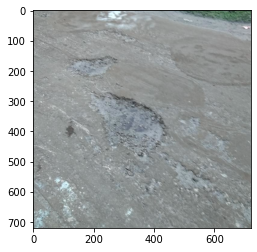

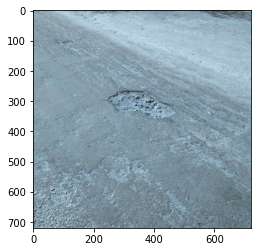

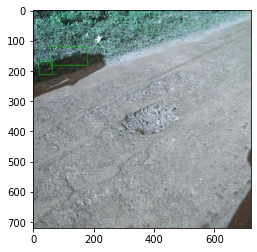

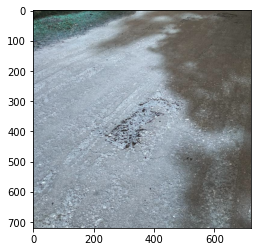

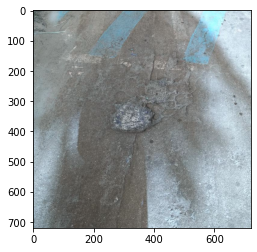

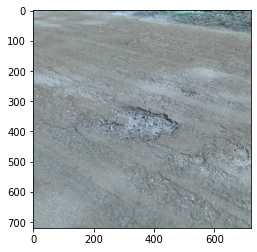

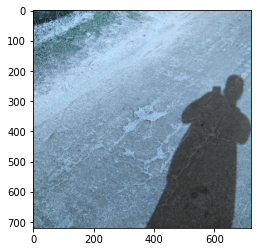

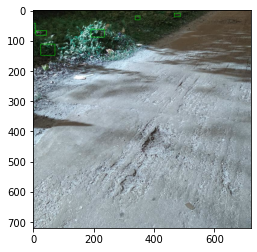

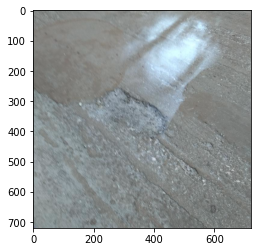

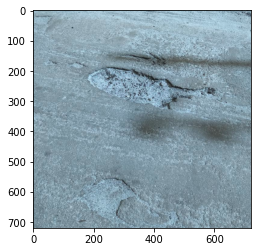

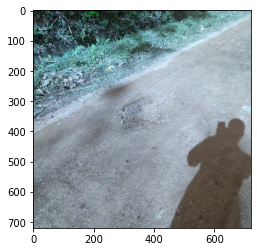

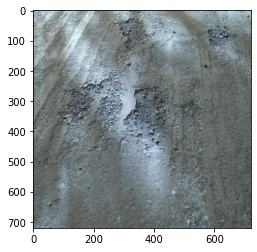

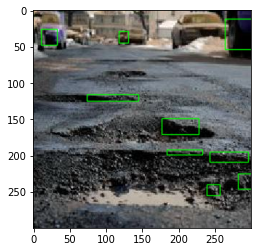

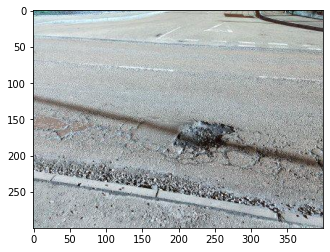

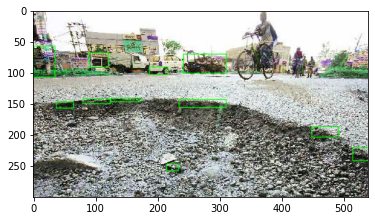

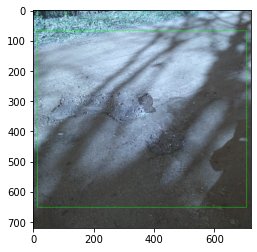

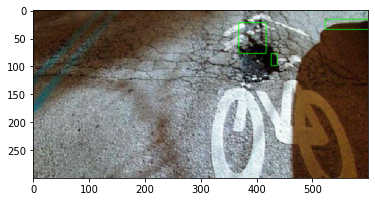

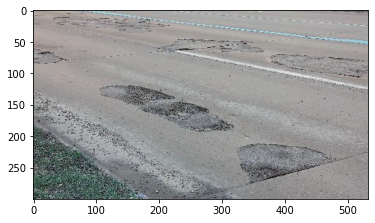

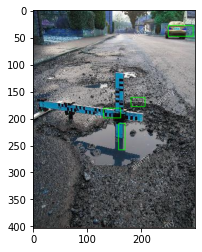

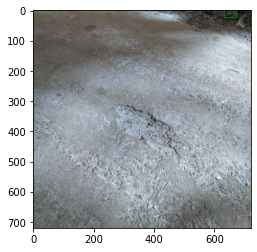

In [ ]:
import os
import cv2
from keras.models import load_model

model_final = load_model('/content/drive/MyDrive/temp/RoadnetClassifier.hdf5')

solutions_raw ={}


z=0
path_test = '/content/drive/MyDrive/Potholes/test'
for e,i in enumerate(os.listdir(path_test)):
    if i in ['_annotations.csv']:
      continue
    z += 1
    if z> 20:
      break
    img = cv2.imread(os.path.join(path_test,i))
    ss.setBaseImage(img)
    ss.switchToSelectiveSearchFast()
    ssresults = ss.process()
    imout = img.copy()
    potential_boxes =[]
    for e,result in enumerate(ssresults):
        if e < 2000:
            x,y,w,h = result
            timage = imout[y:y+h,x:x+w]
            resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
            img = np.expand_dims(resized, axis=0)
            out= model_final.predict(img,verbose = 0)
            if out[0][0] > 0.70:
                temp_allocation = [x,y,h,w]
                potential_boxes.append(temp_allocation)
    solutions_raw[i] = potential_boxes
    potential_boxes = merge_boxes(potential_boxes, 200)
    for box in potential_boxes:
      x,y,h,w = box
      cv2.rectangle(imout, (x, y), (x+w, y+h), (0, 255, 0), 1, cv2.LINE_AA)

    plt.figure()
    plt.imshow(imout)

        

In [ ]:
df_all = pd.read_csv('/content/drive/MyDrive/Potholes/test/_annotations.csv')


In [ ]:
def calculate_iou(box1, box2):
    # box format: [x, y, w, h]
    x1, y1, h1, w1 = box1
    x2, y2, h2, w2 = box2
    # calculate the intersection area
    x_left = max(x1, x2)
    y_top = max(y1, y2)
    x_right = min(x1+w1, x2+w2)
    y_bottom = min(y1+h1, y2+h2)
    if x_right < x_left or y_bottom < y_top:
        return 0.0
    else:
        intersection_area = (x_right - x_left) * (y_bottom - y_top)
    # calculate the union area
    box1_area = w1 * h1
    box2_area = w2 * h2
    union_area = box1_area + box2_area - intersection_area
    # calculate the IOU
    iou = intersection_area / union_area
    return iou



def calculate_overall_iou(boxes1, boxes2):
    tp = 0
    fp = 0
    fn = 0
    # calculate the IOU for each pair of boxes
    iou_list = []
    for box1 in boxes1:
        overed_rate_all = 0
        for box2 in boxes2:
            iou = calculate_iou(box1, box2)
            overed_rate_all= max(overed_rate_all,iou)
            if iou == 0.0:
                continue
            iou_list.append(iou)
        
        if overed_rate_all > 0.3:
          tp +=1
        else:
          fp +=1

    for box2 in boxes2:
        overed_rate_all = 0
        for box1 in boxes1:
            iou = calculate_iou(box2, box1)
            overed_rate_all= max(overed_rate_all,iou)
        if overed_rate_all == 0:
            fn +=1


    # calculate the overall IOU
    try:
      overall_iou = sum(iou_list)/len(iou_list)
    except:
      overall_iou = 0;
    return overall_iou , (tp, fp, fn)


def get_image_datafram(filename, dataframe_all):
  new_df = df_all[df_all['filename'] == filename]
  return new_df 



In [ ]:
iou_all = [] 
precision_all = []
recall_all = []
f1_all = []
preditct_boxes = []
marked_boxes = []
for key, value in solutions_raw.items():
    preditct_boxes = merge_boxes(solutions_raw[key], 200)
    marked_boxes_dataframe = get_image_datafram(key,df_all)

    marked_boxes = []

    for xtra, row in marked_boxes_dataframe.iterrows():
        x1 = row['xmin']
        y1 = row['ymin']
        x2 = row['xmax']
        y2 = row['ymax']
        temp = [x1,y1, y2-y1, x2-x1]
        marked_boxes.append(temp)

    iou, matrix = calculate_overall_iou(preditct_boxes,marked_boxes)
    iou_all.append(iou)
    tp = matrix[0]
    fp = matrix[1]
    fn = matrix[2]
    try:
      precision=round(tp/(tp+fp),3)
    except:
      precision = 0
    precision_all.append(precision)
    try:
        recall=round(tp/(tp+fn),3)
    except ZeroDivisionError:
        recall = 0
    recall_all.append(recall)
    try:
        f1= round(2*((precision*recall)/(precision+recall)),3)
    except ZeroDivisionError:
        f1 = 0
    f1_all.append(f1)

    print(preditct_boxes)
    print(marked_boxes)
    print(f"iou: {iou}")
    print(f"tp: {tp}" )
    print(f"fp: {fp}")
    print(f"fn: {fn}" )
    print(f"precision: {precision}" )
    print(f"recall: {recall}" )
    print(f"f1_all: {f1}" )



[]
[[116, 146, 72, 159], [181, 265, 215, 255]]
iou: 0
tp: 0
fp: 0
fn: 2
precision: 0
recall: 0.0
f1_all: 0
[]
[[241, 261, 96, 233], [78, 94, 44, 67]]
iou: 0
tp: 0
fp: 0
fn: 2
precision: 0
recall: 0.0
f1_all: 0
[[58, 120, 62, 122], [19, 170, 43, 44]]
[[273, 300, 115, 216], [469, 199, 38, 65], [300, 228, 76, 161]]
iou: 0
tp: 0
fp: 2
fn: 3
precision: 0.0
recall: 0.0
f1_all: 0
[]
[[229, 285, 173, 226]]
iou: 0
tp: 0
fp: 0
fn: 1
precision: 0
recall: 0.0
f1_all: 0
[]
[[245, 294, 116, 163], [359, 221, 89, 103]]
iou: 0
tp: 0
fp: 0
fn: 2
precision: 0
recall: 0.0
f1_all: 0
[]
[[202, 310, 124, 277]]
iou: 0
tp: 0
fp: 0
fn: 1
precision: 0
recall: 0.0
f1_all: 0
[]
[[292, 295, 113, 151], [296, 452, 37, 43]]
iou: 0
tp: 0
fp: 0
fn: 2
precision: 0
recall: 0.0
f1_all: 0
[[9, 67, 16, 35], [25, 112, 37, 47], [0, 43, 32, 8], [337, 19, 13, 16], [466, 10, 12, 20], [191, 63, 26, 45]]
[[353, 379, 103, 95], [282, 530, 75, 85]]
iou: 0
tp: 0
fp: 6
fn: 2
precision: 0.0
recall: 0.0
f1_all: 0
[]
[[152, 252, 168, 286]]

In [ ]:
avg_iou = sum(iou_all)/len(iou_all)
avg_precision = sum(precision_all)/len(precision_all)
avg_recall = sum(recall_all)/len(recall_all)
avg_f1 = sum(f1_all)/len(f1_all)

print(f"avg_iou: {avg_iou}")
print(f"avg_precision: {avg_precision}")
print(f"avg_recall: {avg_recall}")
print(f"avg_f1_all: {avg_f1}")

avg_iou: 0.012064571904399985
avg_precision: 0.0
avg_recall: 0.0
avg_f1_all: 0.0


# testing merge_boxes function

In [ ]:
import os
import cv2
from keras.models import load_model

model_final = load_model('/content/drive/MyDrive/temp/RoadnetClassifier.hdf5')

solutions_raw ={}


z=0
path_test = '/content/drive/MyDrive/Potholes/test'
for e,i in enumerate(os.listdir(path_test)):
    if i in ['_annotations.csv']:
      continue
    z += 1
    if z> 20:
      break
    img = cv2.imread(os.path.join(path_test,i))
    ss.setBaseImage(img)
    ss.switchToSelectiveSearchFast()
    ssresults = ss.process()
    imout = img.copy()
    potential_boxes =[]
    for e,result in enumerate(ssresults):
        if e < 2000:
            x,y,w,h = result
            timage = imout[y:y+h,x:x+w]
            resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
            img = np.expand_dims(resized, axis=0)
            out= model_final.predict(img,verbose = 0)
            if out[0][0] > 0.70:
                temp_allocation = [x,y,h,w]
                potential_boxes.append(temp_allocation)
    solutions_raw[i] = potential_boxes
    potential_boxes = merge_boxes(potential_boxes, 200)
    for box in potential_boxes:
      x,y,h,w = box
      cv2.rectangle(imout, (x, y), (x+w, y+h), (0, 255, 0), 1, cv2.LINE_AA)

    plt.figure()
    plt.imshow(imout)

        

# Clustring based on potholes number

In [47]:
df_all = pd.read_csv('/content/drive/MyDrive/Potholes/train/_annotations.csv')
counts = df_all['filename'].value_counts()
counts

img-595_jpg.rf.f7d0b11ae9ac53ec52b154e001c576e1.jpg    19
img-471_jpg.rf.fbadb2fbf6289251aa19248169f4b835.jpg    18
img-510_jpg.rf.123e51756929d8babd5c1cd39b0edcad.jpg    17
img-552_jpg.rf.ec9f1bee01c43e917639e624ebacc332.jpg    17
img-571_jpg.rf.df521aa0f45aa986a3e937de4083272e.jpg    15
                                                       ..
img-247_jpg.rf.506670aed39eb7dd2d892350788582fb.jpg     1
img-209_jpg.rf.50a35176830c86029ddfb4d3af626c08.jpg     1
img-424_jpg.rf.5178a699e9c56cf7ba61ede4751b6696.jpg     1
img-396_jpg.rf.af26b72d42bbf054aee8f62025ea2bf8.jpg     1
img-12_jpg.rf.473a95f653f8c7227e4bc5c73f8ed19b.jpg      1
Name: filename, Length: 465, dtype: int64

In [48]:
import tensorflow as tf
import numpy as np

# Generate a list of integers
data = []

for i in range(0,len(counts)):
    data.append(counts[i])

#change to np.array
my_array = np.array(data)
type(my_array)

numpy.ndarray

#### clustring into 3 group based on counts

In [49]:
from sklearn.cluster import KMeans

# Create a KMeans object with 3 clusters
kmeans = KMeans(n_clusters=3)

# Fit the KMeans object to the data
kmeans.fit(my_array.reshape(-1, 1))

# Get the cluster labels for each data point
labels = kmeans.labels_

# Get the cluster centers for each group
centers = kmeans.cluster_centers_

# Sort the centers to get the upper, lower, and mid points
sorted_centers = np.sort(centers.reshape(-1))

# Print the upper, lower, and mid points for each group
for i in range(len(sorted_centers)):
    if i == 0:
        lower = my_array.min()
        upper = sorted_centers[i]
        mid = (lower + upper) / 2
    elif i == len(sorted_centers) - 1:
        lower = sorted_centers[i-1]
        upper = my_array.max()
        mid = (upper + lower) / 2
    else:
        lower = sorted_centers[i-1]
        upper = sorted_centers[i]
        mid = (upper + lower) / 2
    print(f"Group {i+1}: Lower = {lower}, Upper = {upper}, Mid = {mid}")

Group 1: Lower = 1, Upper = 1.6395663956639601, Mid = 1.31978319783198
Group 2: Lower = 1.6395663956639601, Upper = 5.428571428571436, Mid = 3.5340689121176982
Group 3: Lower = 5.428571428571436, Upper = 19, Mid = 12.214285714285719


/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
